In [1]:
import numpy as np
import pandas as pd

In [2]:
# Loading the dataset

pdf = pd.read_csv('combined_dataframes.csv')
pdf = pdf.drop(['Unnamed: 0'], axis=1)
pdf.head()

C:\Users\arpan\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,loan_id,mon_rep_dt,UPB_x,default_status,loan_age,credit_score,1st_pay_dt,1st_home,maturity_dt,MI%,...,channel,prod_type,state,home_type,zip_code,purpose,loan_term,no_borrowers,seller,servicer
0,F115Q1000001,201610,0.00,0,18,796,201505,9,203004,0,...,R,FRM,IA,SF,51000,C,180,1,Other sellers,Other servicers
1,F115Q1000002,201709,100534.98,0,30,805,201504,9,204503,0,...,B,FRM,NE,SF,68500,N,360,1,Other sellers,Other servicers
2,F115Q1000003,201709,320369.23,0,31,730,201503,9,203002,0,...,R,FRM,KY,SF,40400,N,180,2,Other sellers,NATIONSTARMTGELLCDBA
3,F115Q1000004,201709,281120.77,0,29,762,201505,9,204504,0,...,R,FRM,CO,SF,81200,N,360,2,Other sellers,USBANKNA
4,F115Q1000005,201709,183054.42,0,29,777,201505,9,204504,0,...,R,FRM,IL,SF,61700,N,360,1,Other sellers,Other servicers


In [3]:
ndf = pdf.loc[pdf['default_status'].isin(['0','1'])]

### How are the different numeric features correlated?

### Heatmap

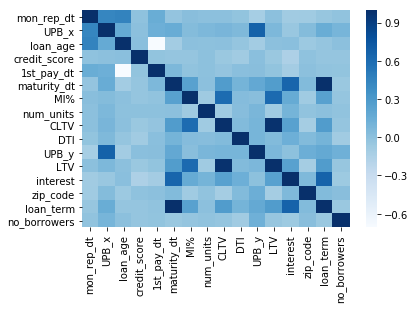

In [17]:
# Calculate correlations
# corr = npdf7.drop('num_units', 1).corr()
corr = ndf.corr()
 
# Heatmap
sns.heatmap(corr, cmap="Blues")

### Individual Scatterplots

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

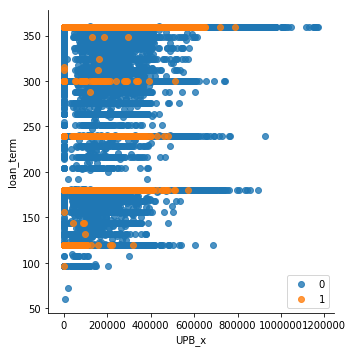

In [13]:
# 1.  UPB_x  VS  loan_term

# Use the 'hue' argument to provide a factor variable
sns.lmplot( x="UPB_x", y="loan_term", data=ndf, fit_reg=False, hue='default_status', legend=False)
 
# Move the legend to an empty part of the plot
plt.legend(loc='lower right')

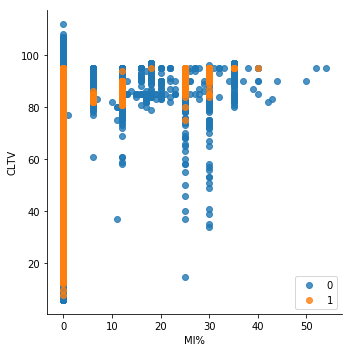

In [12]:
# 2.  MI%  VS  CLTV  (after removing extreme points)

a = ndf.loc[ndf['CLTV']<200]
b = a.loc[ndf['MI%']<200]

# Use the 'hue' argument to provide a factor variable
sns.lmplot( x="MI%", y="CLTV", data=b, fit_reg=False, hue='default_status', legend=False)
 
# Move the legend to an empty part of the plot
plt.legend(loc='lower right')

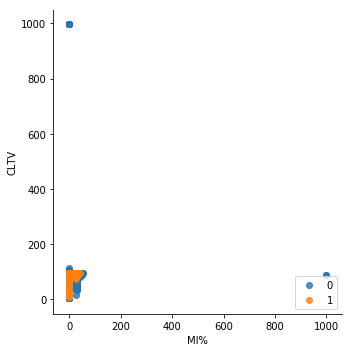

In [5]:
# Use the 'hue' argument to provide a factor variable
sns.lmplot( x="MI%", y="CLTV", data=ndf, fit_reg=False, hue='default_status', legend=False)
 
# Move the legend to an empty part of the plot
plt.legend(loc='lower right')

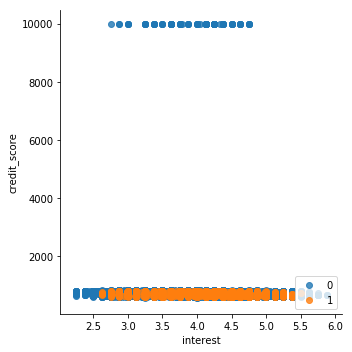

In [18]:
# 3. 

# Use the 'hue' argument to provide a factor variable
sns.lmplot( x="interest", y="credit_score", data=ndf, fit_reg=False, hue='default_status', legend=False)
 
# Move the legend to an empty part of the plot
plt.legend(loc='lower right')

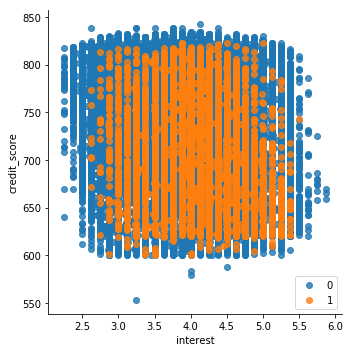

In [19]:
c = ndf.loc[ndf['credit_score']<2000]

sns.lmplot( x="interest", y="credit_score", data=c, fit_reg=False, hue='default_status', legend=False)

plt.legend(loc='lower right')

In [20]:
## is there a negative relationship between interest charged and credit-score??

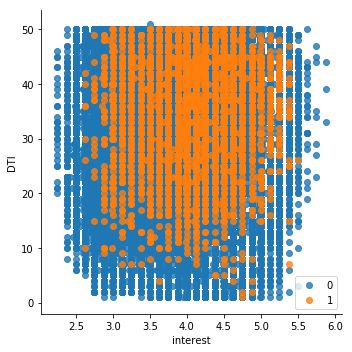

In [23]:
# 4. DTI  VS  interest

d = ndf.loc[ndf['DTI']<200]

sns.lmplot( x="interest", y="DTI", data=d, fit_reg=False, hue='default_status', legend=False)

plt.legend(loc='lower right')

### Conclusion

### As we can see from the above plots, there is no major insightful correlation that can be drawn from the dataset at this point.